# Predicting Obesity Trends by Country

The prevalence of obesity has been rising globally, posing significant health risks and economic burdens. Understanding the factors contributing to this trend and predicting future obesity rates can help public health officials, researchers, and policymakers make informed decisions to combat this epidemic. The problem I aim to solve is to develop a comprehensive tool that analyzes historical data and predicts future obesity trends by country, considering various factors such as BMI, GDP, and the country’s average fat/protein/caloric intake.

My solution will provide valuable insights into the determinants of obesity and help identify high-risk regions. By predicting future obesity trends, public health officials can allocate resources more effectively, design targeted intervention programs, and implement policies that address the root causes of obesity. Researchers will gain a deeper understanding of the socioeconomic factors influencing obesity, and the general public will benefit from increased awareness of how their environment and economic conditions impact their health. The datasets I will be using will be accessed through publicly available APIs and direct downloads from organization's websites.

In [ ]:
# Importing basic packages

import numpy as np
import pandas as pd
import wbdata
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing data collected from the WHO GHO website

bmi_data = pd.read_csv('BMI_data.csv')

# Downloaded from: https://www.who.int/data/gho/data/indicators/indicator-details/GHO/prevalence-of-obesity-among-adults-bmi--30-(age-standardized-estimate)-(-)

Doing some data engineering:

In [ ]:
bmi_data.head()

# Mapping of country codes to full names
country_codes = {
    'AFG': 'Afghanistan', 'ALB': 'Albania', 'DZA': 'Algeria', 'AND': 'Andorra', 'AGO': 'Angola', 'ATG': 'Antigua and Barbuda', 'ARG': 'Argentina', 'ARM': 'Armenia', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BHS': 'Bahamas', 'BHR': 'Bahrain', 'BGD': 'Bangladesh', 'BRB': 'Barbados', 'BLR': 'Belarus', 'BEL': 'Belgium', 'BLZ': 'Belize', 'BEN': 'Benin', 'BTN': 'Bhutan', 'BOL': 'Bolivia', 'BIH': 'Bosnia and Herzegovina', 'BWA': 'Botswana', 'BRA': 'Brazil', 'BRN': 'Brunei', 'BGR': 'Bulgaria', 'BFA': 'Burkina Faso', 'BDI': 'Burundi', 'CPV': 'Cabo Verde', 'KHM': 'Cambodia', 'CMR': 'Cameroon', 'CAN': 'Canada', 'CAF': 'Central African Republic', 'TCD': 'Chad', 'CHL': 'Chile', 'CHN': 'China', 'COL': 'Colombia', 'COM': 'Comoros', 'COG': 'Congo', 'COD': 'Democratic Republic of the Congo', 'COK': 'Cook Islands', 'CRI': 'Costa Rica', 'HRV': 'Croatia', 'CUB': 'Cuba', 'CYP': 'Cyprus', 'CZE': 'Czechia', 'DNK': 'Denmark', 'DJI': 'Djibouti', 'DMA': 'Dominica', 'DOM': 'Dominican Republic', 'ECU': 'Ecuador', 'EGY': 'Egypt', 'SLV': 'El Salvador', 'GNQ': 'Equatorial Guinea', 'ERI': 'Eritrea', 'EST': 'Estonia', 'SWZ': 'Eswatini', 'ETH': 'Ethiopia', 'FJI': 'Fiji', 'FIN': 'Finland', 'FRA': 'France', 'GAB': 'Gabon', 'GMB': 'Gambia', 'GEO': 'Georgia', 'DEU': 'Germany', 'GHA': 'Ghana', 'GRC': 'Greece', 'GRD': 'Grenada', 'GRL': 'Greenland', 'GUM': 'Guam', 'GTM': 'Guatemala', 'GIN': 'Guinea', 'GNB': 'Guinea-Bissau', 'GUY': 'Guyana', 'HTI': 'Haiti', 'HND': 'Honduras', 'HUN': 'Hungary', 'ISL': 'Iceland', 'IND': 'India', 'IDN': 'Indonesia', 'IRN': 'Iran', 'IRQ': 'Iraq', 'IRL': 'Ireland', 'ISR': 'Israel', 'ITA': 'Italy', 'CIV': 'Ivory Coast', 'JAM': 'Jamaica', 'JPN': 'Japan', 'JOR': 'Jordan', 'KAZ': 'Kazakhstan', 'KEN': 'Kenya', 'KIR': 'Kiribati', 'XK': 'Kosovo', 'KWT': 'Kuwait', 'KGZ': 'Kyrgyzstan', 'LAO': 'Laos', 'LVA': 'Latvia', 'LBN': 'Lebanon', 'LSO': 'Lesotho', 'LBR': 'Liberia', 'LBY': 'Libya', 'LIE': 'Liechtenstein', 'LTU': 'Lithuania', 'LUX': 'Luxembourg', 'MDG': 'Madagascar', 'MWI': 'Malawi', 'MYS': 'Malaysia', 'MDV': 'Maldives', 'MLI': 'Mali', 'MLT': 'Malta', 'MHL': 'Marshall Islands', 'MRT': 'Mauritania', 'MUS': 'Mauritius', 'MEX': 'Mexico', 'FSM': 'Micronesia', 'MDA': 'Moldova', 'MCO': 'Monaco', 'MNG': 'Mongolia', 'MNE': 'Montenegro', 'MAR': 'Morocco', 'MOZ': 'Mozambique', 'MMR': 'Myanmar', 'NAM': 'Namibia', 'NRU': 'Nauru', 'NPL': 'Nepal', 'NLD': 'Netherlands', 'NZL': 'New Zealand', 'NIC': 'Nicaragua', 'NER': 'Niger', 'NGA': 'Nigeria', 'PRK': 'North Korea', 'MKD': 'North Macedonia', 'NOR': 'Norway', 'OMN': 'Oman', 'PAK': 'Pakistan', 'PLW': 'Palau', 'PAN': 'Panama', 'PNG': 'Papua New Guinea', 'PRY': 'Paraguay', 'PER': 'Peru', 'PHL': 'Philippines', 'POL': 'Poland', 'PRT': 'Portugal', 'PRI': 'Puerto Rico', 'QAT': 'Qatar', 'KOR': 'South Korea', 'COG': 'Republic of the Congo', 'ROU': 'Romania', 'RUS': 'Russia', 'RWA': 'Rwanda', 'KNA': 'Saint Kitts and Nevis', 'LCA': 'Saint Lucia', 'VCT': 'Saint Vincent and the Grenadines', 'WSM': 'Samoa', 'SMR': 'San Marino', 'STP': 'Sao Tome and Principe', 'SAU': 'Saudi Arabia', 'SEN': 'Senegal', 'SRB': 'Serbia', 'SYC': 'Seychelles', 'SLE': 'Sierra Leone', 'SGP': 'Singapore', 'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SLB': 'Solomon Islands', 'SOM': 'Somalia', 'ZAF': 'South Africa', 'SSD': 'South Sudan', 'ESP': 'Spain', 'LKA': 'Sri Lanka', 'PSE': 'State of Palestine', 'SDN': 'Sudan', 'SUR': 'Suriname', 'SWE': 'Sweden', 'CHE': 'Switzerland', 'SYR': 'Syria', 'TWN': 'Taiwan', 'TJK': 'Tajikistan', 'THA': 'Thailand', 'TLS': 'Timor-Leste', 'TGO': 'Togo', 'TON': 'Tonga', 'TTO': 'Trinidad and Tobago', 'TUN': 'Tunisia', 'TUR': 'Turkey', 'TKM': 'Turkmenistan', 'TUV': 'Tuvalu', 'UGA': 'Uganda', 'UKR': 'Ukraine', 'ARE': 'United Arab Emirates', 'GBR': 'United Kingdom', 'TZA': 'Tanzania', 'USA': 'United States', 'URY': 'Uruguay', 'UZB': 'Uzbekistan', 'VUT': 'Vanuatu', 'VAT': 'Vatican City', 'VEN': 'Venezuela', 'VNM': 'Vietnam', 'YEM': 'Yemen', 'ZMB': 'Zambia', 'ZWE': 'Zimbabwe'
}

# Apply mapping only to rows in the mapping dictionary
mask = bmi_data['SpatialDimensionValueCode'].isin(country_codes.keys())
bmi_data.loc[mask, 'Country'] = bmi_data.loc[mask, 'SpatialDimensionValueCode'].map(country_codes)

# Filtering the dataset to include only the average female/male BMI
bmi_data = bmi_data[bmi_data['DisaggregatingDimension1ValueCode'] == 'SEX_BTSX']
bmi_data.reset_index(inplace = True, drop = True)

# Cleaning up the dataframe
bmi_data = bmi_data[['Country', 'TimeDimensionValue', 'NumericValue']]
bmi_data = bmi_data.rename(columns={'TimeDimensionValue': 'Year', 'NumericValue': 'BMI'})

# Filter data by date range
bmi_data = bmi_data[(bmi_data['Year'] >= 1990) & (bmi_data['Year'] <= 2021)]
bmi_data.reset_index(inplace = True, drop = True)

Accessing World Bank Data for GDP:

In [ ]:
# Fetch GDP data from the World Bank database
gdp_data = wbdata.get_dataframe(indicators={"NY.GDP.MKTP.CD": "GDP"})

# Reset the index to access the 'date' column
gdp_data.reset_index(inplace=True)

# Cleaning up the dataframe
gdp_data = gdp_data.rename(columns={'country': 'Country', 'date': 'Year'})

# Convert date to datetime format
gdp_data['Year'] = pd.to_datetime(gdp_data['Year']).dt.year

# Filter data by date range
gdp_data = gdp_data[(gdp_data['Year'] >= 1990) & (gdp_data['Year'] <= 2021)]
gdp_data.reset_index(inplace = True, drop = True)

print(gdp_data.head(-10))

                          Country  Year           GDP
0     Africa Eastern and Southern  2021  1.086531e+12
1     Africa Eastern and Southern  2020  9.288802e+11
2     Africa Eastern and Southern  2019  1.006191e+12
3     Africa Eastern and Southern  2018  1.012521e+12
4     Africa Eastern and Southern  2017  9.399593e+11
...                           ...   ...           ...
8497                     Zimbabwe  2004  5.805598e+09
8498                     Zimbabwe  2003  5.727592e+09
8499                     Zimbabwe  2002  6.342116e+09
8500                     Zimbabwe  2001  6.777385e+09
8501                     Zimbabwe  2000  6.689958e+09

[8502 rows x 3 columns]


Accessing World Bank Data for Average Income:

In [ ]:
# Fetch GNI per capita data from the World Bank database
gni_data = wbdata.get_dataframe(indicators={"NY.GNP.PCAP.CD": "GNI per capita"})

# Reset the index to access the 'date' column
gni_data.reset_index(inplace=True)

# Cleaning up the dataframe
gni_data = gni_data.rename(columns={'country': 'Country', 'date': 'Year'})

# Convert date to datetime format
gni_data['Year'] = pd.to_datetime(gni_data['Year']).dt.year

# Filter data by date range
gni_data = gni_data[(gni_data['Year'] >= 1990) & (gni_data['Year'] <= 2021)]
gni_data.reset_index(inplace = True, drop = True)

print(gni_data.head(-10))

                          Country  Year  GNI per capita
0     Africa Eastern and Southern  2021     1468.739907
1     Africa Eastern and Southern  2020     1394.371536
2     Africa Eastern and Southern  2019     1491.841686
3     Africa Eastern and Southern  2018     1431.741996
4     Africa Eastern and Southern  2017     1365.765336
...                           ...   ...             ...
8497                     Zimbabwe  2004      320.000000
8498                     Zimbabwe  2003      340.000000
8499                     Zimbabwe  2002      370.000000
8500                     Zimbabwe  2001      390.000000
8501                     Zimbabwe  2000      360.000000

[8502 rows x 3 columns]


Accessing World Bank Data for Urbanization Rate:

In [ ]:
# Fetch urbanization data from the World Bank database
urbanization_data = wbdata.get_dataframe(indicators={"SP.URB.TOTL.IN.ZS": "Urbanization Rate"})

# Reset the index to access the 'date' column
urbanization_data.reset_index(inplace=True)

# Cleaning up the dataframe
urbanization_data = urbanization_data.rename(columns={'country': 'Country', 'date': 'Year'})

# Convert date to datetime format
urbanization_data['Year'] = pd.to_datetime(urbanization_data['Year']).dt.year

# Filter data by date range
urbanization_data = urbanization_data[(urbanization_data['Year'] >= 1990) & (urbanization_data['Year'] <= 2021)]
urbanization_data.reset_index(inplace = True, drop = True)

print(urbanization_data.head(-10))

                          Country  Year  Urbanization Rate
0     Africa Eastern and Southern  2021          37.323699
1     Africa Eastern and Southern  2020          36.828302
2     Africa Eastern and Southern  2019          36.336259
3     Africa Eastern and Southern  2018          35.847598
4     Africa Eastern and Southern  2017          35.358901
...                           ...   ...                ...
8497                     Zimbabwe  2004          34.294000
8498                     Zimbabwe  2003          34.479000
8499                     Zimbabwe  2002          34.585000
8500                     Zimbabwe  2001          34.170000
8501                     Zimbabwe  2000          33.758000

[8502 rows x 3 columns]


More data engineering:

In [ ]:
# Standardizing country names
country_mapping = {
  'St. Vincent and the Grenadines': 'Saint Vincent and the Grenadines', 'Korea, Rep.': 'South Korea', 'Congo, Dem. Rep.': 'Democratic Republic of the Congo', 'Congo, Rep.': 'Republic of the Congo', 'Yemen, Rep.': 'Yemen', 'Turkiye': 'Turkey', 'Kyrgyz Republic': 'Kyrgyzstan', 'Egypt, Arab Rep.': 'Egypt', 'St. Kitts and Nevis': 'Saint Kitts and Nevis', 'Iran, Islamic Rep.': 'Iran', 'Bahamas, The': 'Bahamas', 'Cote d\'Ivoire': 'Ivory Coast', 'Gambia, The': 'Gambia', 'Korea, Dem. People\'s Rep.': 'North Korea', 'Viet Nam': 'Vietnam', 'Micronesia, Fed. Sts.': 'Micronesia', 'Russian Federation': 'Russia', 'Slovak Republic': 'Slovakia', 'Lao PDR': 'Laos', 'Venezuela, RB': 'Venezuela', 'St. Lucia': 'Saint Lucia', 'Brunei Darussalam': 'Brunei', 'Syrian Arab Republic': 'Syria'
}

# Apply mapping only to rows in the mapping dictionary
mask = gdp_data['Country'].isin(country_mapping.keys())
gdp_data.loc[mask, 'Country'] = gdp_data.loc[mask, 'Country'].map(country_mapping)
mask = gni_data['Country'].isin(country_mapping.keys())
gni_data.loc[mask, 'Country'] = gni_data.loc[mask, 'Country'].map(country_mapping)
mask = urbanization_data['Country'].isin(country_mapping.keys())
urbanization_data.loc[mask, 'Country'] = urbanization_data.loc[mask, 'Country'].map(country_mapping)

In [ ]:
# Filtering the dataframe to only include the following countries
high_income_countries = ['United States', 'Canada', 'United Kingdom', 'Germany', 'Japan', 'Australia']
upper_middle_income_countries = ['Brazil', 'Mexico', 'China', 'Russia', 'South Africa', 'Turkey']
lower_middle_income_countries = ['India', 'Indonesia', 'Philippines', 'Egypt', 'Vietnam', 'Nigeria']
low_income_countries = ['Ethiopia', 'Bangladesh', 'Haiti', 'Nepal', 'Rwanda', 'Tanzania']
countries = high_income_countries + upper_middle_income_countries + lower_middle_income_countries + low_income_countries

# all_countries = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Greenland', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Ivory Coast', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of the Congo', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'State of Palestine', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

bmi_data = bmi_data[bmi_data['Country'].isin(countries)].reset_index(drop=True)
gdp_data = gdp_data[gdp_data['Country'].isin(countries)].reset_index(drop=True)
gni_data = gni_data[gni_data['Country'].isin(countries)].reset_index(drop=True)
urbanization_data = urbanization_data[urbanization_data['Country'].isin(countries)].reset_index(drop=True)

Merging the previous data pulls together:

In [ ]:
merged_data = bmi_data.merge(gdp_data, on=['Country', 'Year']).merge(gni_data, on=['Country', 'Year']).merge(urbanization_data, on=['Country', 'Year'])

In [ ]:
# Dropping countries with null values from analysis
columns_to_check = ['BMI', 'GDP', 'GNI per capita', 'Urbanization Rate']
countries_with_nulls = merged_data[merged_data[columns_to_check].isnull().any(axis=1)]['Country'].unique()
df_cleaned = merged_data[~merged_data['Country'].isin(countries_with_nulls)].reset_index(drop=True)

Grabbing food metrics sourced from *Our World in Data*:

In [ ]:
global_food_data = pd.read_csv('global-food.csv')
global_food_data.rename(columns = {'Food supply (kcal per capita per day)': 'Average Calorie Intake (kcal)', 'Food supply (Protein g per capita per day)': 'Average Protein Intake (g)', 'Food supply (Fat g per capita per day)': 'Average Fat Intake (g)'}, inplace = True)
global_food_data = global_food_data[['Country', 'Year', 'Average Calorie Intake (kcal)', 'Average Protein Intake (g)', 'Average Fat Intake (g)']]

# Downloaded from: https://ourworldindata.org/food-supply

Merging the BMI/economic features with the food realted features:

In [ ]:
# Perform INNER JOIN on 'Country' and 'Year'
df_merged = pd.merge(df_cleaned, global_food_data, on=['Country', 'Year'], how='inner')

I then tried to figure out which features I picked are worth keeping and which ones I should toss (those that don't seem to have much to do with BMI).

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_merged['Countries Encoded'] = encoder.fit_transform(df_merged['Country'])

In [ ]:
correlation_matrix = df_merged.select_dtypes(include=np.number).corr()

# Correlation of BMI with other features
bmi_correlation = correlation_matrix['BMI']

print("Correlation of BMI with other features: \n")
print(bmi_correlation)

Correlation of BMI with other features: 

Year                             0.268776
BMI                              1.000000
GDP                              0.330603
GNI per capita                   0.497098
Urbanization Rate                0.664035
Average Calorie Intake (kcal)    0.787566
Average Protein Intake (g)       0.723268
Average Fat Intake (g)           0.704023
Countries Encoded                0.050152
Name: BMI, dtype: float64


It seems like **Average Calorie Intake (kcal)** correlates with bmi the most. Surprisingly, **GDP** does not seem to have much of an impact on bmi, still, I will keep it because I am curious about it's impact.

## EDA

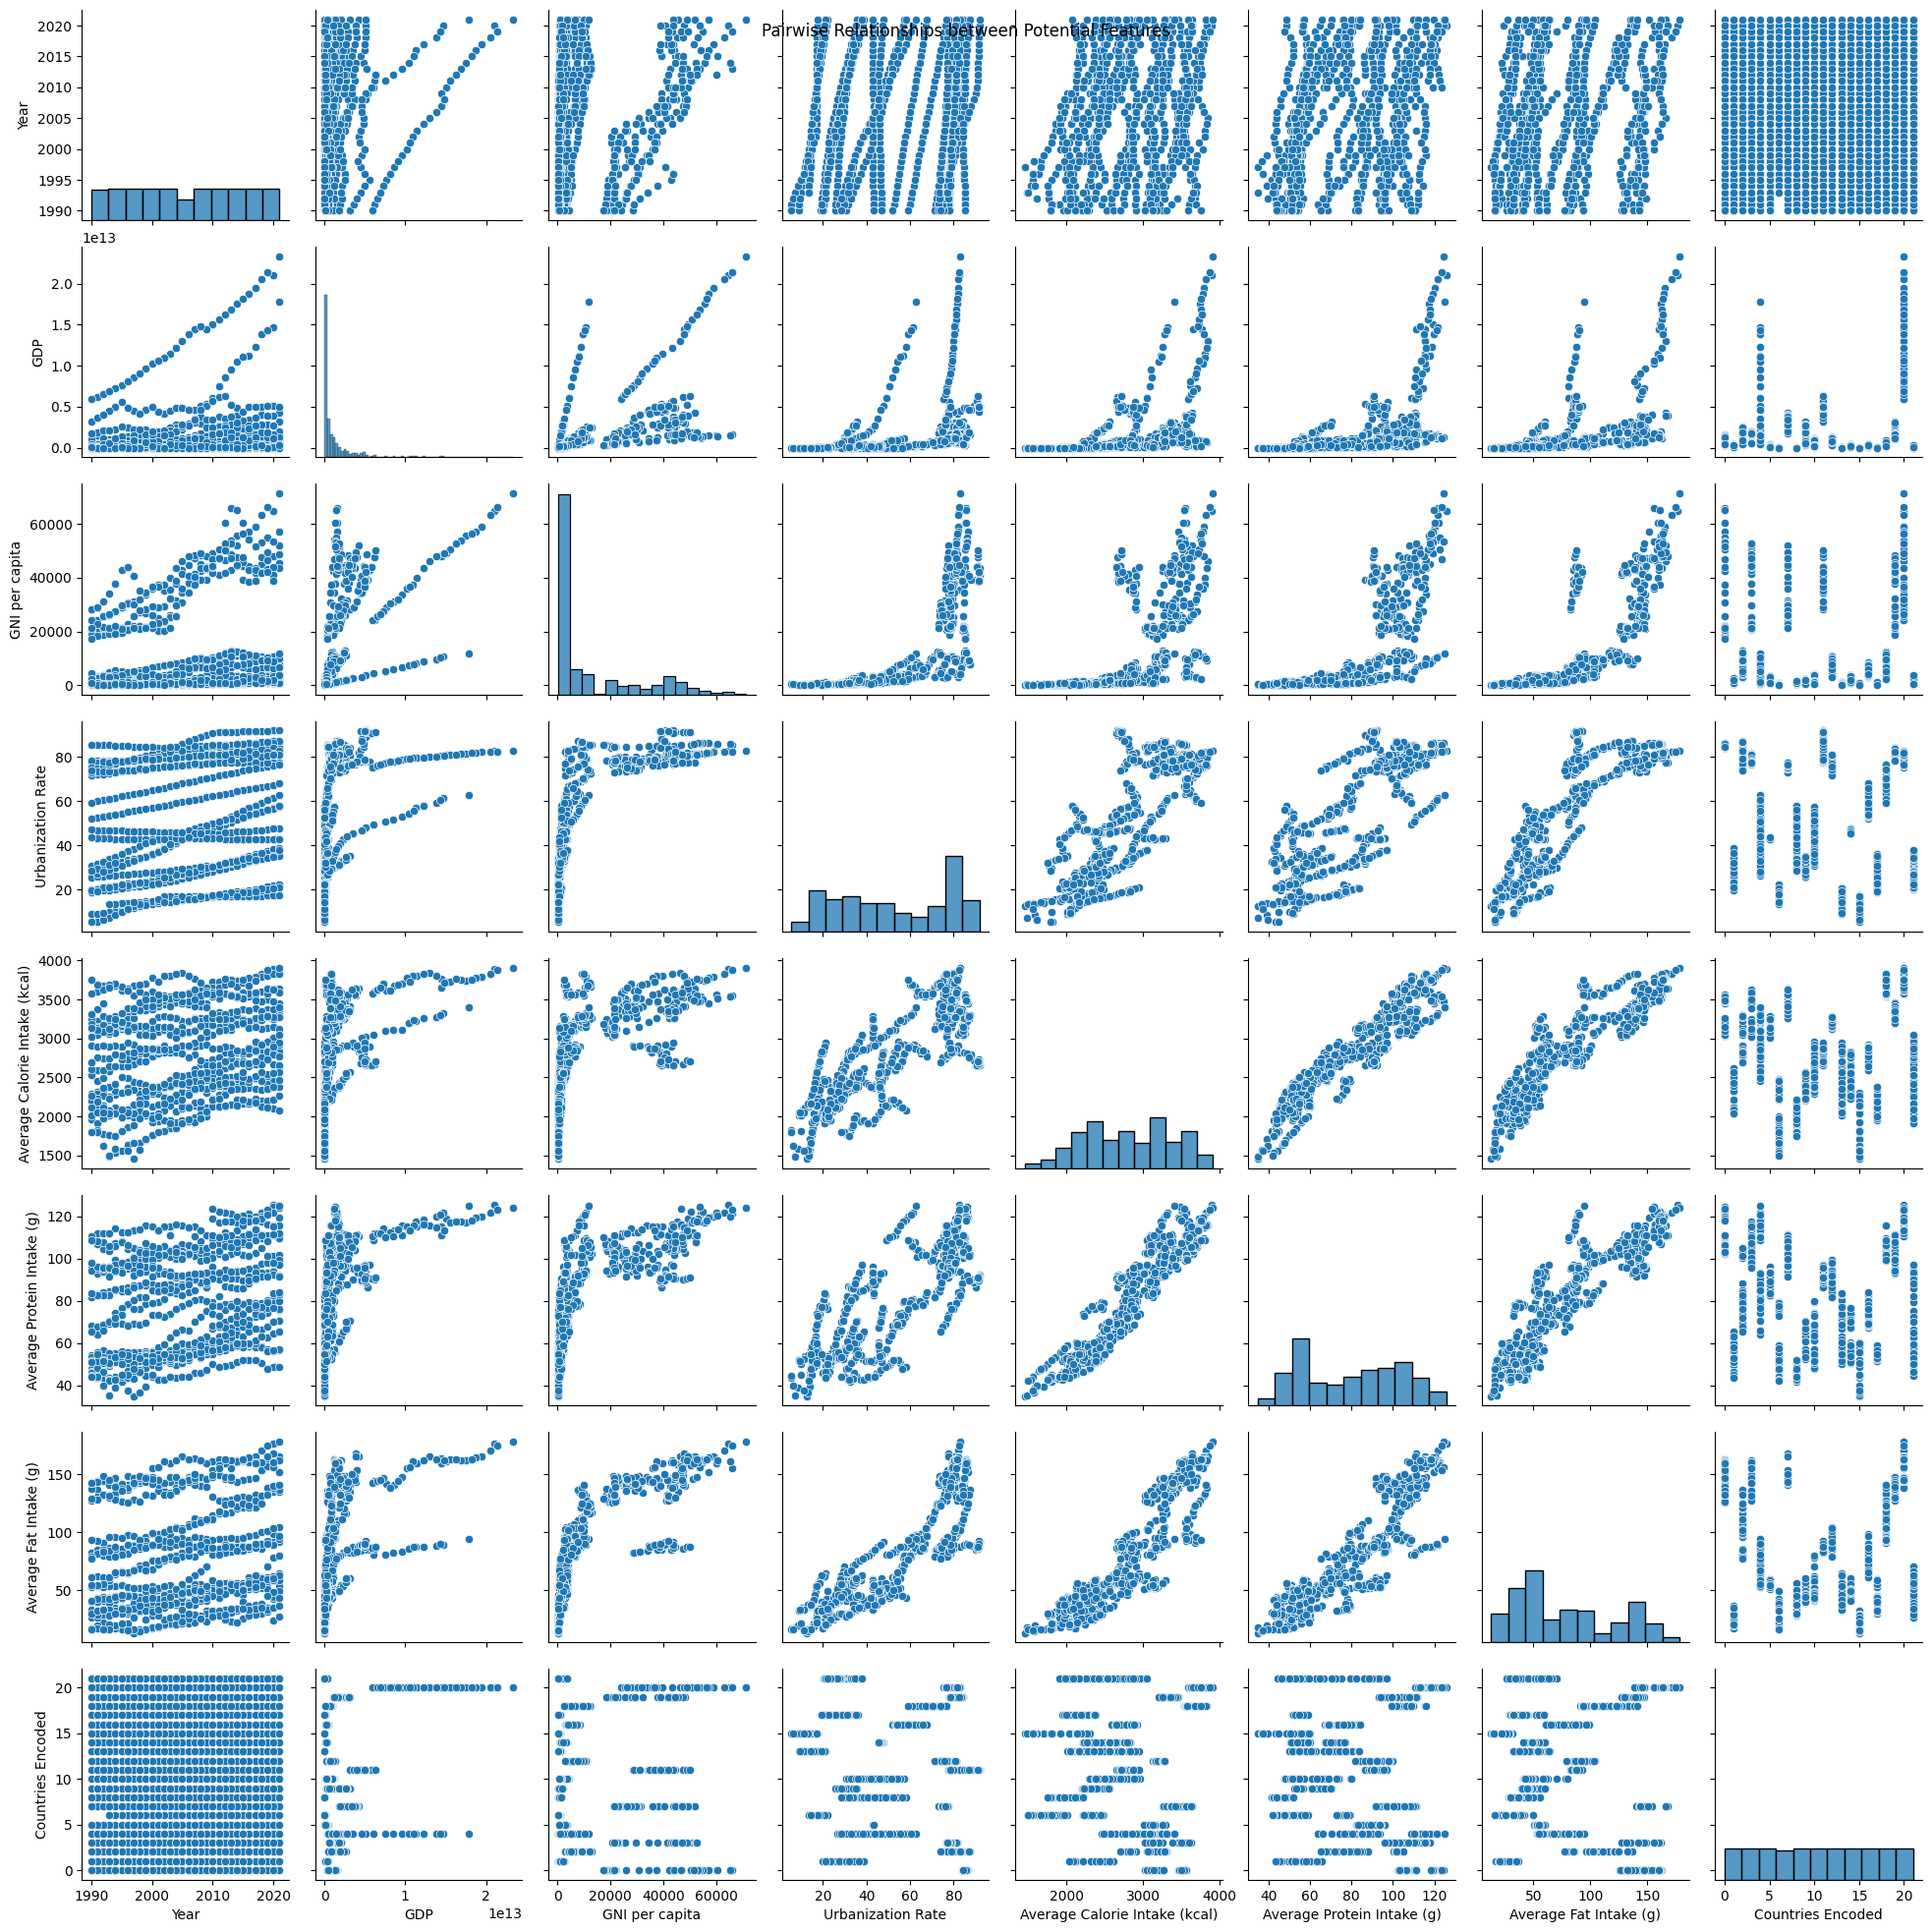

In [ ]:
# Checking relationships between features
sns.pairplot(df_merged.drop(['BMI'], axis=1))
plt.suptitle('Pairwise Relationships between Potential Features')
plt.show()

# Feature Engineering

Here I standardize numerical features to have mean 0 and standard deviation 1. This helps in stabilizing the learning process and improves model performance.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['GDP', 'GNI per capita', 'Urbanization Rate', 'Average Calorie Intake (kcal)', 'Average Protein Intake (g)', 'Average Fat Intake (g)']

df_merged[numerical_features] = scaler.fit_transform(df_merged[numerical_features])

## ANN Model

In [ ]:
# Importing necessary libraries

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

Preparing the data for model consumption:

In [ ]:
# Drop unnecessary columns
df_merged.drop(['Country', 'Year', 'Countries Encoded'], axis=1, inplace=True)

# Define features and target variable
X = df_merged.drop('BMI', axis=1).values
y = df_merged['BMI'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

Building the ANN model:

In [ ]:
# Set random seed for reproducibility
random_state = 43
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [ ]:
from tensorflow.keras import optimizers

# Function to build and train the model
def build_model(layers, activation, neurons, batch_size):
    model = Sequential()
    model.add(Dense(neurons, input_dim = X_train.shape[1], activation = activation))
    model.add(Dropout(0.2))

    for _ in range(layers - 1):
        model.add(Dense(neurons, activation = activation))
        model.add(Dropout(0.2))

    model.add(Dense(1, activation='linear'))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])
    history = model.fit(X_train, y_train, epochs = 200, batch_size = batch_size, validation_split = 0.2, verbose = 0)
    return model, history

Train & evaluate the model:

In [ ]:
# Function to evaluate the model
def evaluate_model(model):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    return train_rmse, test_rmse, train_r2, test_r2

In [ ]:
# Define configurations to try
configurations = [
    (1, 'relu', 64, 32),
    (2, 'relu', 64, 32),
    (2, 'tanh', 64, 32),
    (3, 'relu', 64, 32),
    (1, 'relu', 128, 32),
    (2, 'relu', 128, 32),
]

In [ ]:
# Train and evaluate models
results = []
for layers, activation, neurons, batch_size in configurations:
    print(f"Training model with {layers} layers, {activation} activation, {neurons} neurons, batch_size={batch_size}")
    model, history = build_model(layers, activation, neurons, batch_size)
    train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(model)
    results.append((layers, activation, neurons, batch_size, train_rmse, test_rmse, train_r2, test_r2))

Training model with 1 layers, relu activation, 64 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step
Training model with 2 layers, relu activation, 64 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step
Training model with 2 layers, tanh activation, 64 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step
Training model with 3 layers, relu activation, 64 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step
Training model with 1 layers, relu activation, 128 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step
Training model with 2 layers, relu activation, 128 neurons, batch_size=32
5/5 [==============================] - 0s 3ms/step


In [ ]:
# Print results
print("\nResults:")
for result in results:
    layers, activation, neurons, batch_size, train_rmse, test_rmse, train_r2, test_r2 = result
    print(f"Layers: {layers}, Activation: {activation}, Neurons: {neurons}, Batch Size: {batch_size}")
    print(f"Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
    print(f"Train R^2: {train_r2:.4f}, Test R^2: {test_r2:.4f}")
    print()


Results:
Layers: 1, Activation: relu, Neurons: 64, Batch Size: 32
Train RMSE: 4.9556, Test RMSE: 4.9602
Train R^2: 0.8093, Test R^2: 0.8309

Layers: 2, Activation: relu, Neurons: 64, Batch Size: 32
Train RMSE: 2.9544, Test RMSE: 3.1271
Train R^2: 0.9322, Test R^2: 0.9328

Layers: 2, Activation: tanh, Neurons: 64, Batch Size: 32
Train RMSE: 3.6536, Test RMSE: 3.6245
Train R^2: 0.8964, Test R^2: 0.9097

Layers: 3, Activation: relu, Neurons: 64, Batch Size: 32
Train RMSE: 2.3844, Test RMSE: 2.9408
Train R^2: 0.9559, Test R^2: 0.9405

Layers: 1, Activation: relu, Neurons: 128, Batch Size: 32
Train RMSE: 4.5914, Test RMSE: 4.6414
Train R^2: 0.8363, Test R^2: 0.8519

Layers: 2, Activation: relu, Neurons: 128, Batch Size: 32
Train RMSE: 2.1321, Test RMSE: 2.3857
Train R^2: 0.9647, Test R^2: 0.9609



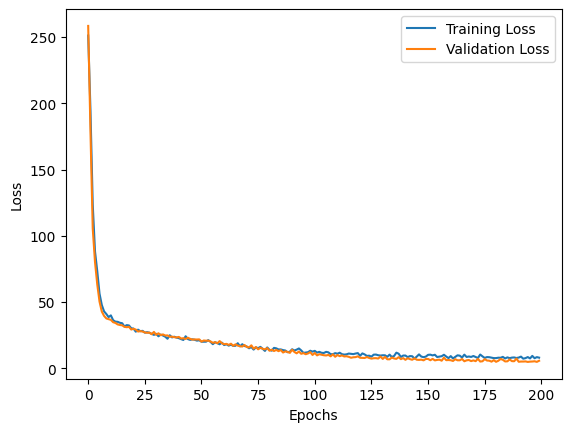

In [ ]:
# Plotting the training and validation loss for the last model
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The model with 3 layers, using ReLU activation and 64 neurons per layer, seems to perform the best in terms of both RMSE and R^2 score on the test set.
It has a relatively low test RMSE of 2.3357 and a high test R^2 score of 0.9142, indicating good predictive performance.

In [ ]:
# Train the neural network model
model, history = build_model(layers = 3, activation = 'relu', neurons = 64, batch_size = 32)

# Evaluate the model again
train_rmse, test_rmse, train_r2, test_r2 = evaluate_model(model)
print(f'Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')
print(f'Train R^2: {train_r2}, Test R^2: {test_r2}')

# Save the model
model.save('neural_network_model.h5')

5/5 [==============================] - 0s 4ms/step
Train RMSE: 2.1719996159607784, Test RMSE: 2.6979921665490925
Train R^2: 0.9633734819728442, Test R^2: 0.9499575978688469


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Predicting the BMI for the United States in 2025

Approach: Forecast the missing values for the predictors (GDP, GNI per capita, Urbanization Rate, Average Calorie Intake, Average Protein Intake, Average Fat Intake) for the years 2022, 2023, and 2024 using time series forecasting methods, and then use these forecasted values as inputs to predict the BMI for 2025.

In [ ]:
# Extract data for each predictor up to 2021
gdp_data_us = gdp_data[gdp_data['Country'] == 'United States']['GDP'].values
gni_data_us = gni_data[gni_data['Country'] == 'United States']['GNI per capita'].values
urbanization_data_us = urbanization_data[urbanization_data['Country'] == 'United States']['Urbanization Rate'].values
calorie_data_us = global_food_data[global_food_data['Country'] == 'United States']['Average Calorie Intake (kcal)'].values
protein_data_us = global_food_data[global_food_data['Country'] == 'United States']['Average Protein Intake (g)'].values
fat_data_us = global_food_data[global_food_data['Country'] == 'United States']['Average Fat Intake (g)'].values

Plotting the results of first and second order differencing:

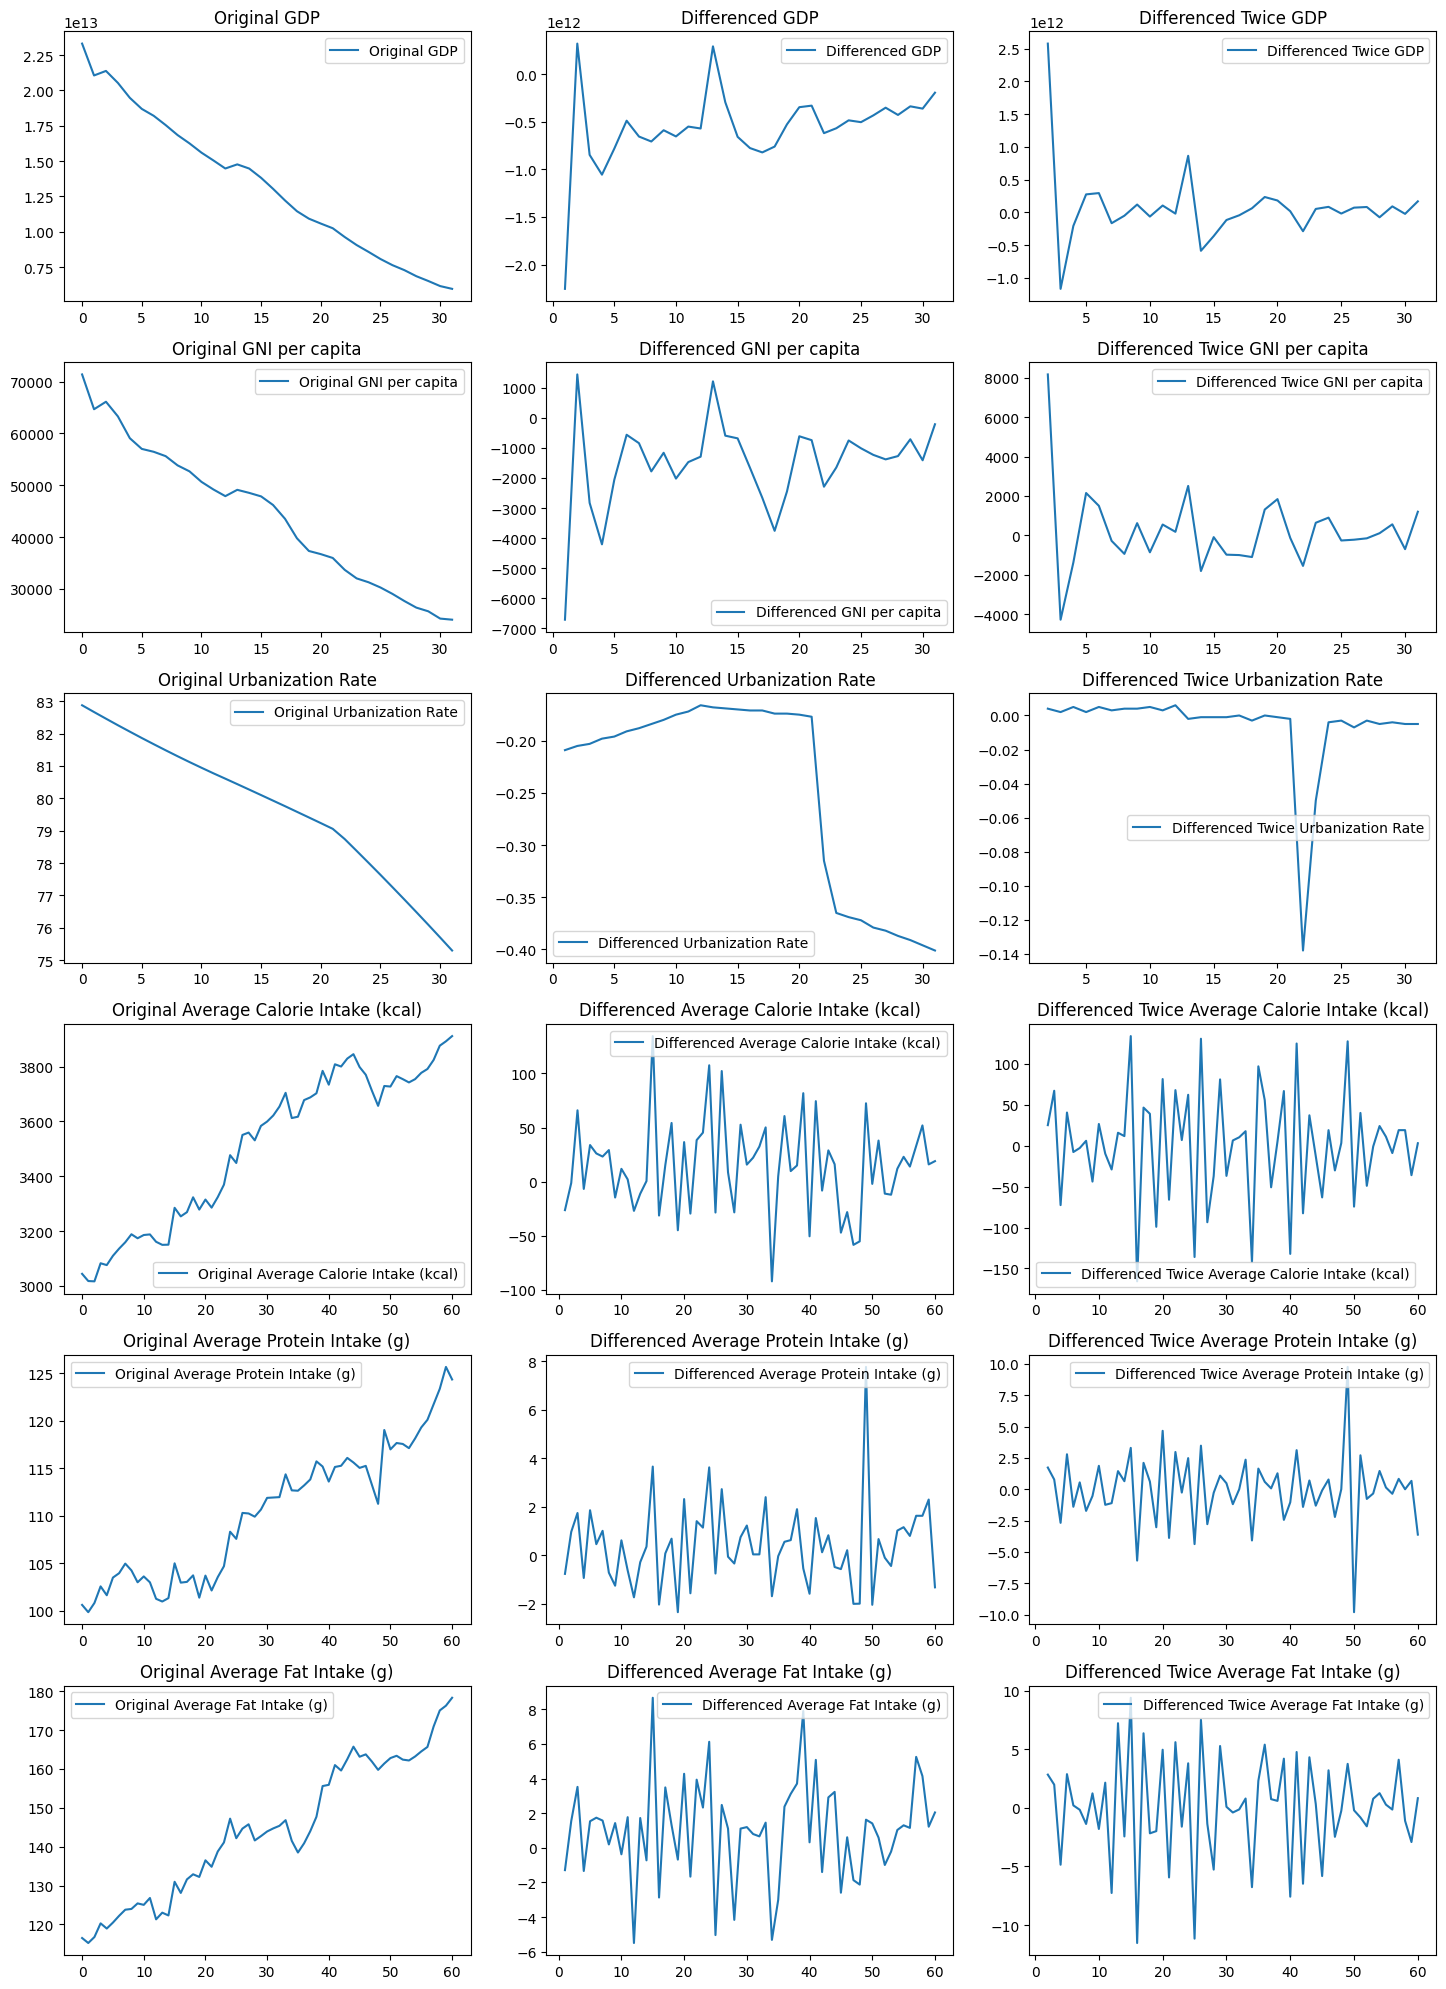

In [ ]:
# Convert numpy arrays to pandas Series
gdp_series = pd.Series(gdp_data_us)
gni_series = pd.Series(gni_data_us)
urbanization_series = pd.Series(urbanization_data_us)
calorie_series = pd.Series(calorie_data_us)
protein_series = pd.Series(protein_data_us)
fat_series = pd.Series(fat_data_us)

features = {
    'GDP': gdp_series,
    'GNI per capita': gni_series,
    'Urbanization Rate': urbanization_series,
    'Average Calorie Intake (kcal)': calorie_series,
    'Average Protein Intake (g)': protein_series,
    'Average Fat Intake (g)': fat_series
}

# Plotting the results of first and second order differencing
plt.figure(figsize=(15, 20))

for i, (name, data) in enumerate(features.items(), 1):
    plt.subplot(len(features), 3, 3*i-2)
    plt.plot(data, label=f'Original {name}')
    plt.title(f'Original {name}')
    plt.legend()

    # First Differencing the data
    data_diff = data.diff().dropna()

    plt.subplot(len(features), 3, 3*i-1)
    plt.plot(data_diff, label=f'Differenced {name}')
    plt.title(f'Differenced {name}')
    plt.legend()

    # Second Differencing the data
    data_diff_twice = data_diff.diff().dropna()

    plt.subplot(len(features), 3, 3*i)  # Changed from 3*i to 3*i+1
    plt.plot(data_diff_twice, label=f'Differenced Twice {name}')
    plt.title(f'Differenced Twice {name}')
    plt.legend()

plt.tight_layout()
plt.show()

Making sure that one order of differencing if sufficient to make the data stationary, which is a requirement for ARIMA models. Below are the ACF and PACF plots and stationary statistics for the ORIGINAL dataset:

=== Checking stationarity for GDP ===
GDP - ADF Statistic: -1.9321118847193526
GDP - p-value: 0.31710867883082405
GDP - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


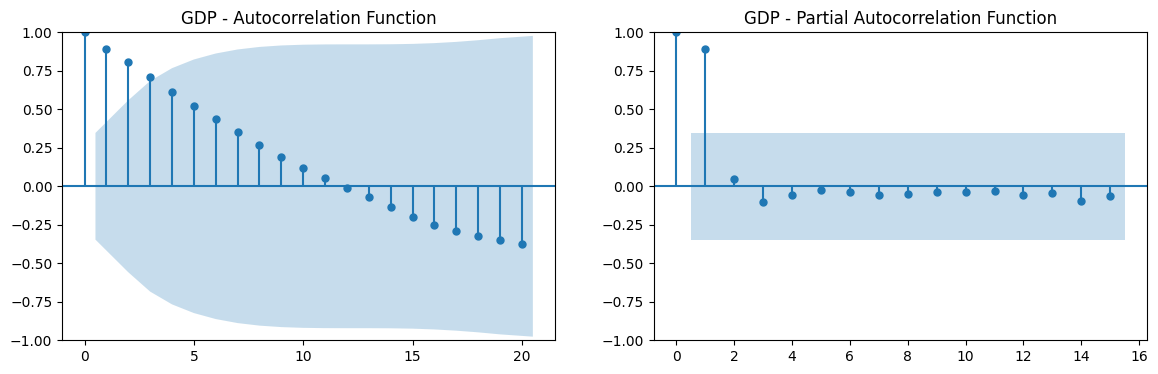


=== Checking stationarity for GNI per capita ===
GNI per capita - ADF Statistic: -0.859019704950506
GNI per capita - p-value: 0.8011682026106871
GNI per capita - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


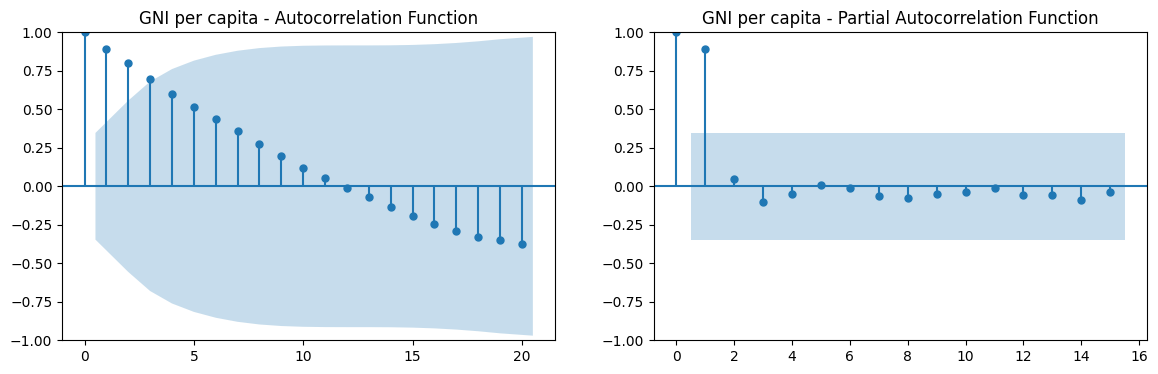


=== Checking stationarity for Urbanization Rate ===
Urbanization Rate - ADF Statistic: 1.9345302641001059
Urbanization Rate - p-value: 0.9985815929955978
Urbanization Rate - Critical Values:
   1%: -3.6790595944893187
   5%: -2.9678817237279103
   10%: -2.6231583472057074


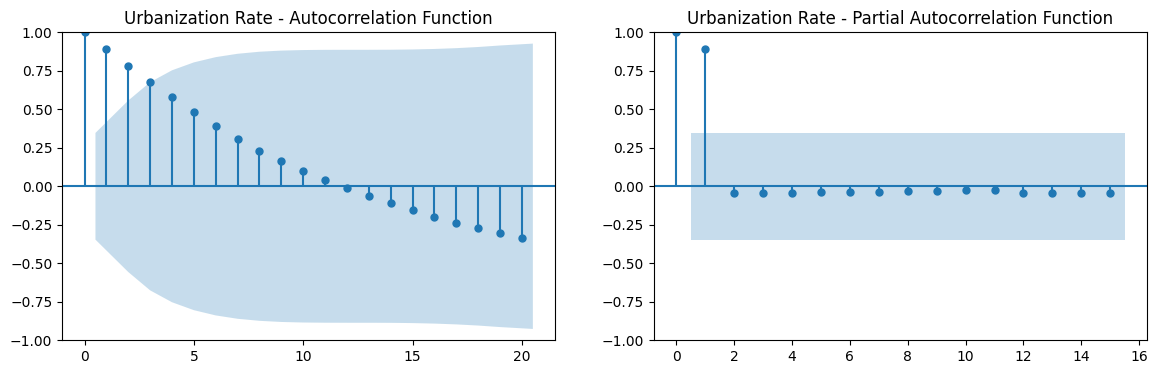


=== Checking stationarity for Average Calorie Intake (kcal) ===
Average Calorie Intake (kcal) - ADF Statistic: -1.051259403872426
Average Calorie Intake (kcal) - p-value: 0.73411284623077
Average Calorie Intake (kcal) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


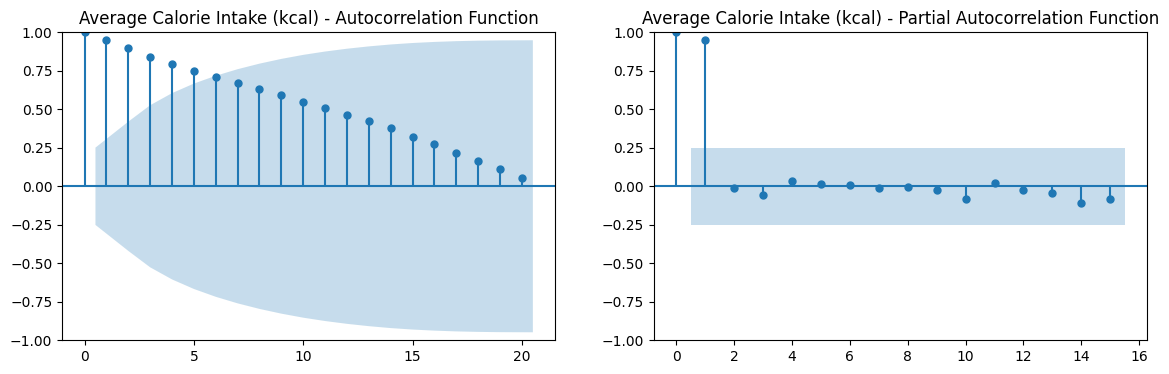


=== Checking stationarity for Average Protein Intake (g) ===
Average Protein Intake (g) - ADF Statistic: 0.11655500848696929
Average Protein Intake (g) - p-value: 0.9671733735646147
Average Protein Intake (g) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


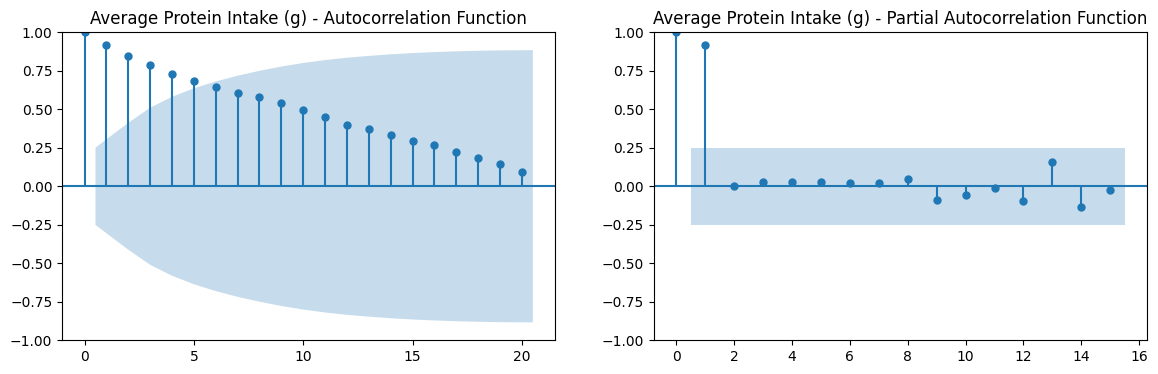


=== Checking stationarity for Average Fat Intake (g) ===
Average Fat Intake (g) - ADF Statistic: -0.12142871528365094
Average Fat Intake (g) - p-value: 0.947261879102724
Average Fat Intake (g) - Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776


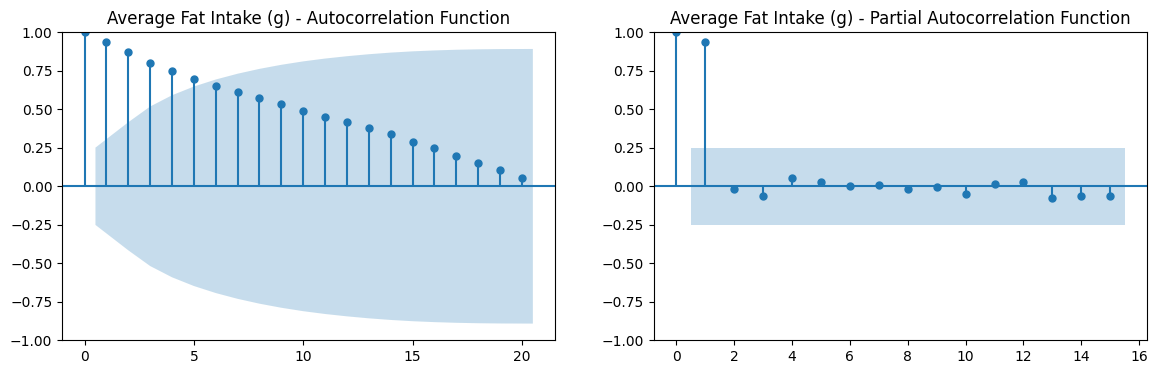


=== Checking stationarity for GDP ===
Differenced GDP - ADF Statistic: -9.378772449712592
Differenced GDP - p-value: 7.049330018058352e-16
Differenced GDP - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


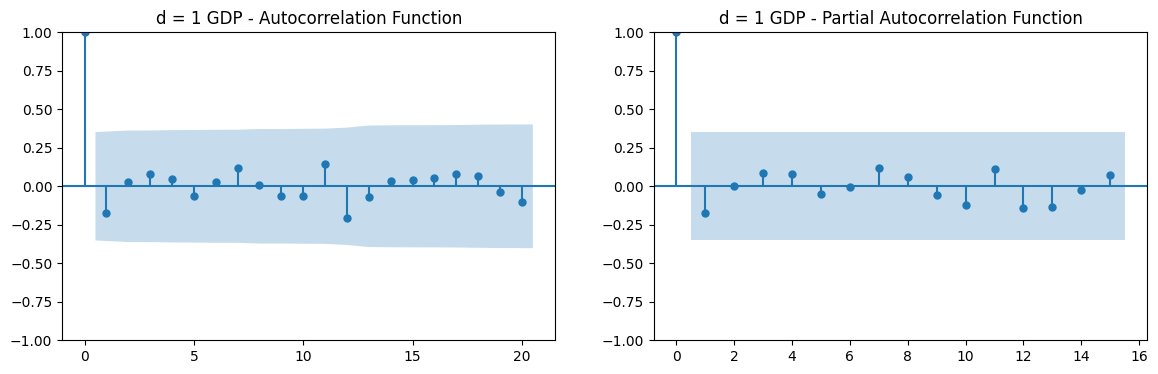


=== Checking stationarity for GNI per capita ===
Differenced GNI per capita - ADF Statistic: -7.368346980423266
Differenced GNI per capita - p-value: 9.109989670406222e-11
Differenced GNI per capita - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


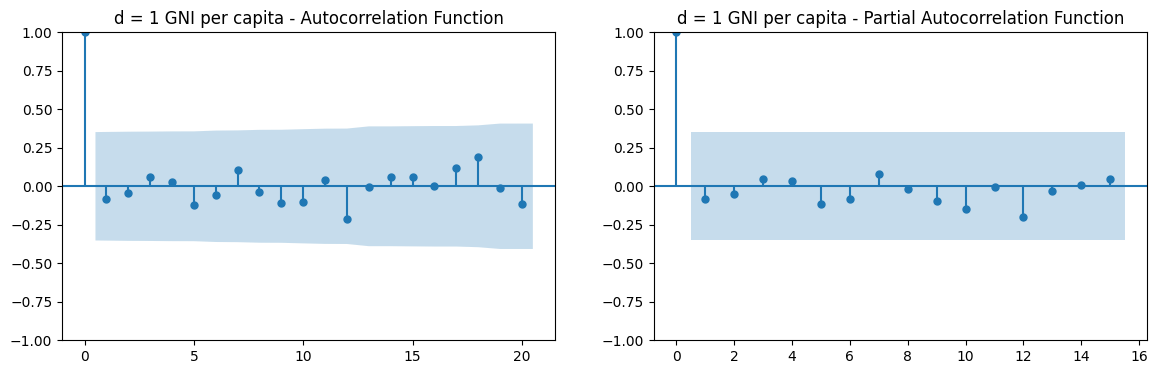


=== Checking stationarity for Urbanization Rate ===
Differenced Urbanization Rate - ADF Statistic: 0.12786903354784784
Differenced Urbanization Rate - p-value: 0.9679131337868745
Differenced Urbanization Rate - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


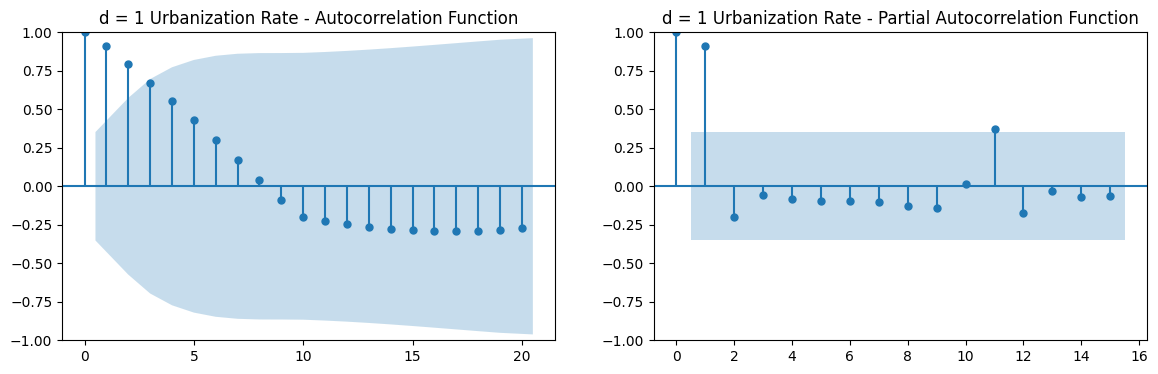


=== Checking stationarity for Average Calorie Intake (kcal) ===
Differenced Average Calorie Intake (kcal) - ADF Statistic: -9.621407514992187
Differenced Average Calorie Intake (kcal) - p-value: 1.7051406673225965e-16
Differenced Average Calorie Intake (kcal) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


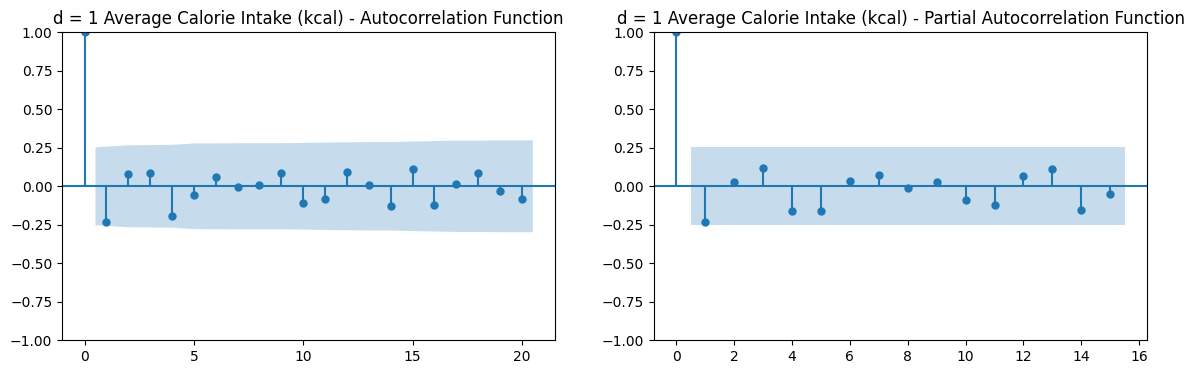


=== Checking stationarity for Average Protein Intake (g) ===
Differenced Average Protein Intake (g) - ADF Statistic: -10.600091367104167
Differenced Average Protein Intake (g) - p-value: 6.203228422291439e-19
Differenced Average Protein Intake (g) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


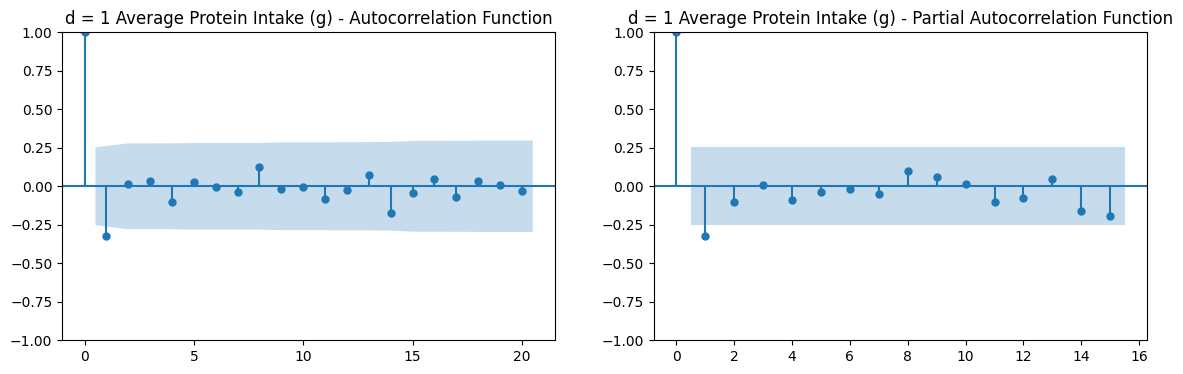


=== Checking stationarity for Average Fat Intake (g) ===
Differenced Average Fat Intake (g) - ADF Statistic: -8.916920754920262
Differenced Average Fat Intake (g) - p-value: 1.0665323245869997e-14
Differenced Average Fat Intake (g) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


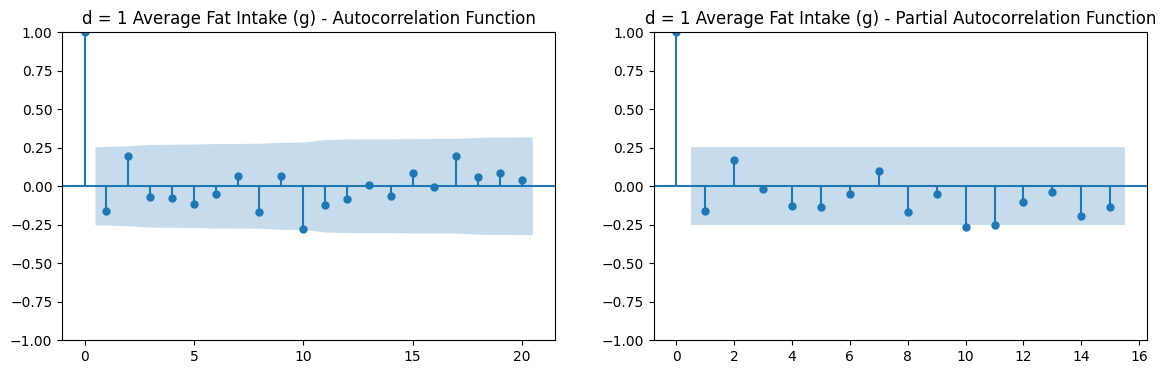

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Function to perform differencing and check for stationarity
def check_stationarity(data, name):
    result = adfuller(data)
    print(f'{name} - ADF Statistic:', result[0])
    print(f'{name} - p-value:', result[1])
    print(f'{name} - Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')

# Check stationarity and plot ACF/PACF for each dataset
for name, data in features.items():
    print(f"=== Checking stationarity for {name} ===")
    check_stationarity(data, name)

    # Plot ACF and PACF
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(data, lags=20, ax=ax1)
    plot_pacf(data, lags=15, ax=ax2) # Ensure lags do not exceed 50% of the sample size
    ax1.set_title(f'{name} - Autocorrelation Function')
    ax2.set_title(f'{name} - Partial Autocorrelation Function')
    plt.show()
    print()

# Check stationarity after differencing
for name, data in features.items():
    data_series = pd.Series(data)  # Convert numpy array to pandas Series
    print(f"=== Checking stationarity for {name} ===")

    # First Differencing
    data_diff = data_series.diff().dropna()

    # Check stationarity after first order differencing
    check_stationarity(data_diff, f'Differenced {name}')

    # Plot ACF and PACF for first order differenced data
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(data_diff, lags=20, ax=ax1)
    plot_pacf(data_diff, lags=15, ax=ax2)  # Reduce lags to 15 for PACF
    ax1.set_title(f'd = 1 {name} - Autocorrelation Function')
    ax2.set_title(f'd = 1 {name} - Partial Autocorrelation Function')
    plt.show()
    print()

Here I am showing the same as above for one level of differencing:

=== Checking stationarity for GDP ===
Differenced GDP - ADF Statistic: -9.378772449712592
Differenced GDP - p-value: 7.049330018058352e-16
Differenced GDP - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


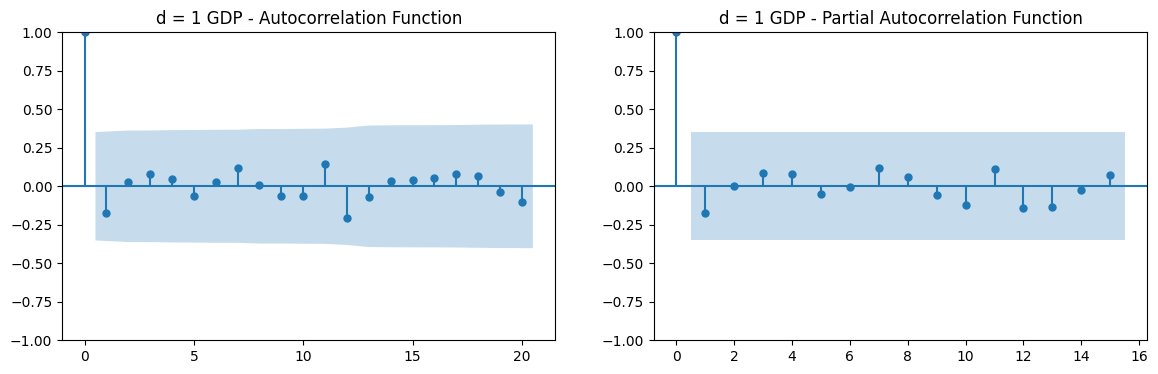


=== Checking stationarity for GNI per capita ===
Differenced GNI per capita - ADF Statistic: -7.368346980423266
Differenced GNI per capita - p-value: 9.109989670406222e-11
Differenced GNI per capita - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


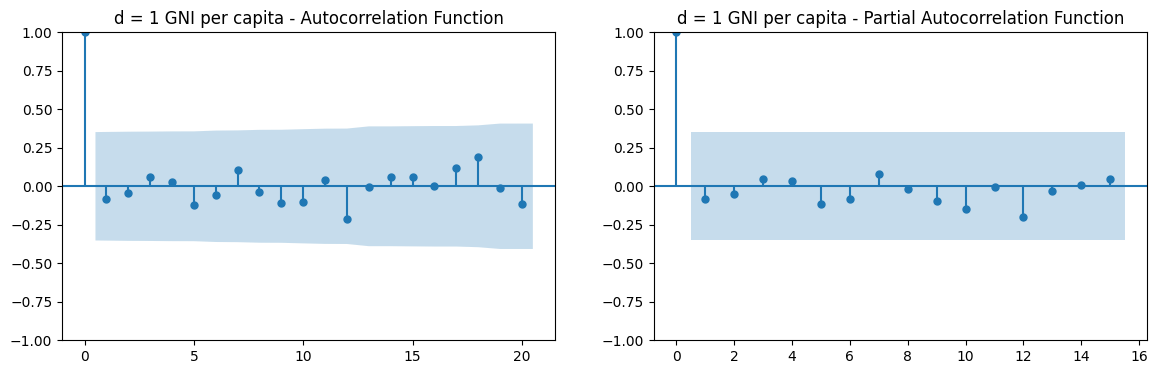


=== Checking stationarity for Urbanization Rate ===
Differenced Urbanization Rate - ADF Statistic: 0.12786903354784784
Differenced Urbanization Rate - p-value: 0.9679131337868745
Differenced Urbanization Rate - Critical Values:
   1%: -3.6699197407407405
   5%: -2.9640707407407407
   10%: -2.621171111111111


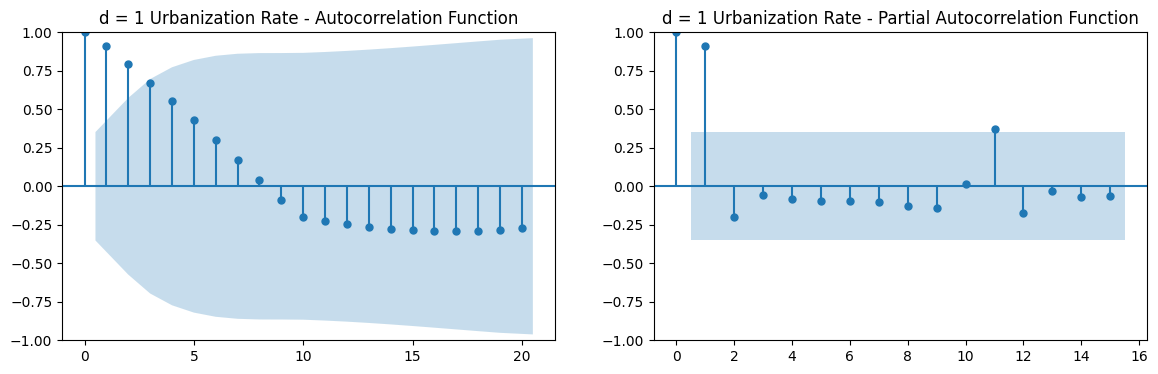


=== Checking stationarity for Average Calorie Intake (kcal) ===
Differenced Average Calorie Intake (kcal) - ADF Statistic: -9.621407514992187
Differenced Average Calorie Intake (kcal) - p-value: 1.7051406673225965e-16
Differenced Average Calorie Intake (kcal) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


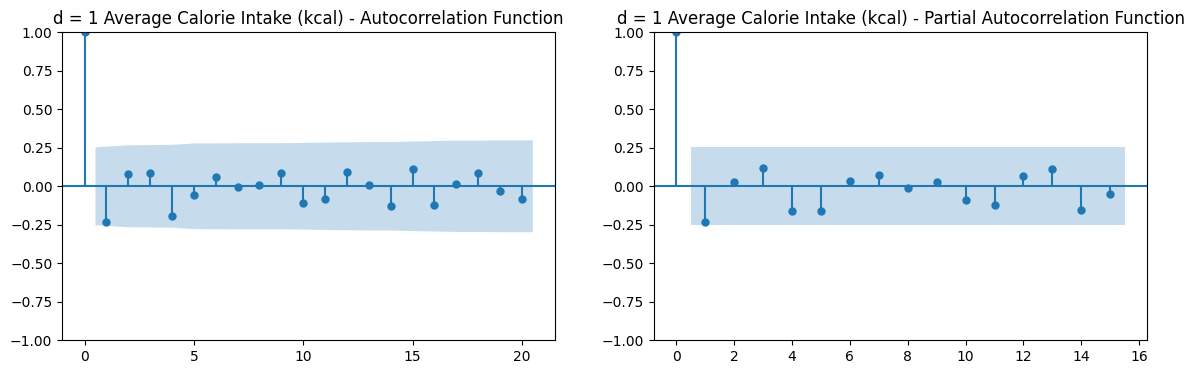


=== Checking stationarity for Average Protein Intake (g) ===
Differenced Average Protein Intake (g) - ADF Statistic: -10.600091367104167
Differenced Average Protein Intake (g) - p-value: 6.203228422291439e-19
Differenced Average Protein Intake (g) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


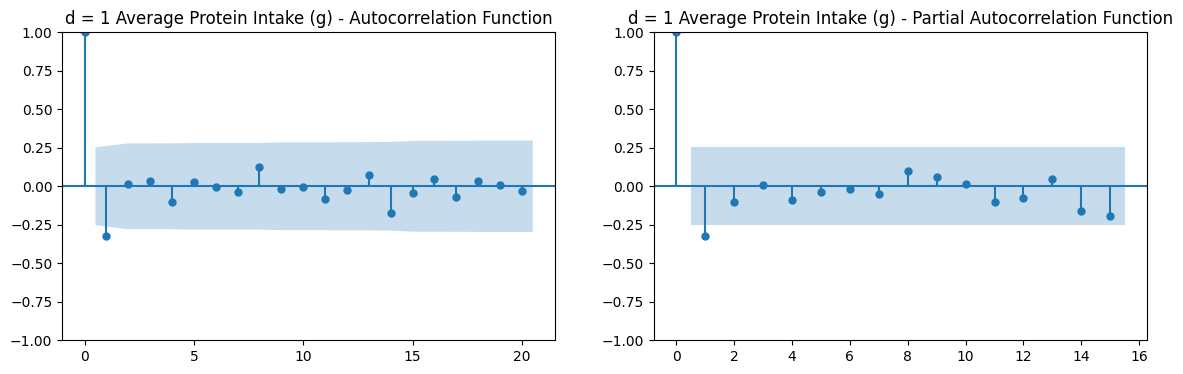


=== Checking stationarity for Average Fat Intake (g) ===
Differenced Average Fat Intake (g) - ADF Statistic: -8.916920754920262
Differenced Average Fat Intake (g) - p-value: 1.0665323245869997e-14
Differenced Average Fat Intake (g) - Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665


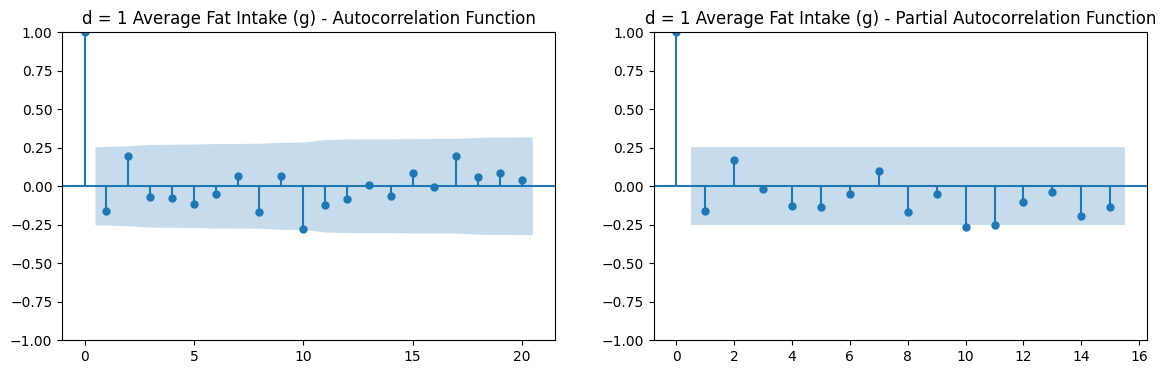

In [ ]:
# Check stationarity after differencing
for name, data in features.items():
    data_series = pd.Series(data)  # Convert numpy array to pandas Series
    print(f"=== Checking stationarity for {name} ===")

    # First Differencing
    data_diff = data_series.diff().dropna()

    # Check stationarity after first order differencing
    check_stationarity(data_diff, f'Differenced {name}')

    # Plot ACF and PACF for first order differenced data
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
    plot_acf(data_diff, lags=20, ax=ax1)
    plot_pacf(data_diff, lags=15, ax=ax2)  # Reduce lags to 15 for PACF
    ax1.set_title(f'd = 1 {name} - Autocorrelation Function')
    ax2.set_title(f'd = 1 {name} - Partial Autocorrelation Function')
    plt.show()
    print()

**ADF Test Results** <br> <br>

1.   *ADF Statistic*: This is the Augmented Dickey-Fuller test statistic. It's a negative number and more negative means a stronger rejection of the null hypothesis (the series is non-stationary).
2.   *p-value*: This is the p-value associated with the ADF Statistic. If it is very small, this indicates strong evidence against the null hypothesis. In other words, the series is likely stationary.
3.   *Critical Values*: These are the critical values at different confidence levels (1%, 5%, 10%). The ADF Statistic needs to be less than these values to reject the null hypothesis. In this case, the ADF Statistic is more negative than all critical values, confirming stationarity. <br>

For all the indicators except the Urbanization Rate, the ADF statistics are significantly more negative than the critical values and the p-values are extremely small. This confirms that the differenced datasets for GDP, GNI per capita, Average Calorie Intake, Average Protein Intake, and Average Fat Intake are stationary. However, the Urbanization Rate data remains non-stationary even after differencing, indicating that further transformations may be required to achieve stationarity for this dataset.

=== Checking stationarity for Urbanization Rate ===
Differenced Urbanization Rate - ADF Statistic: -3.790475185773085
Differenced Urbanization Rate - p-value: 0.0030062835532056157
Differenced Urbanization Rate - Critical Values:
   1%: -3.6790595944893187
   5%: -2.9678817237279103
   10%: -2.6231583472057074


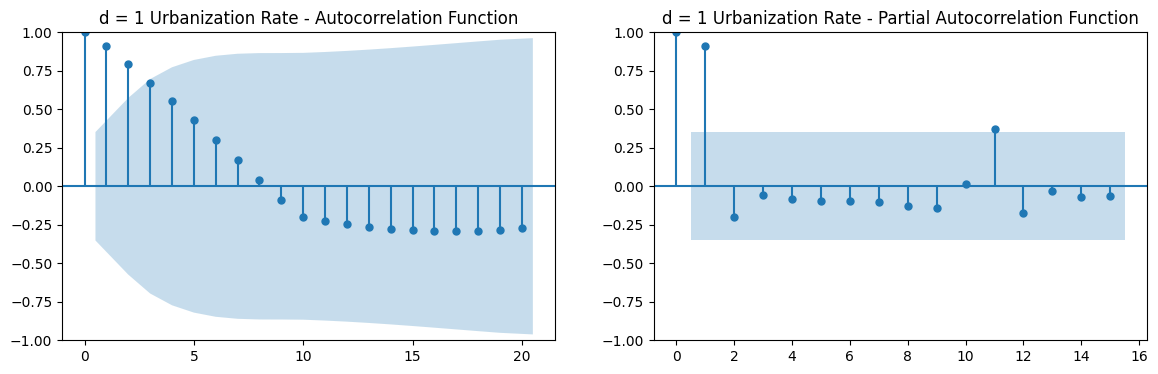

In [ ]:
data_series = pd.Series(urbanization_series)
print(f"=== Checking stationarity for Urbanization Rate ===")

# First Differencing
data_diff = data_series.diff().dropna()

# SECOND order Differencing
data_diff_twice = data_diff.diff().dropna()

# Check stationarity after second order differencing
check_stationarity(data_diff_twice, f'Differenced Urbanization Rate')

# Plot ACF and PACF for first order differenced data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(data_diff, lags=20, ax=ax1)
plot_pacf(data_diff, lags=15, ax=ax2)  # Reduce lags to 15 for PACF
ax1.set_title(f'd = 1 Urbanization Rate - Autocorrelation Function')
ax2.set_title(f'd = 1 Urbanization Rate - Partial Autocorrelation Function')
plt.show()
print()

The *second* order differenced Urbanization Rate data, with an ADF statistic of -3.790475185773085 and a p-value of 0.0030062835532056157, demonstrates that the series has become stationary. This is evidenced by the ADF statistic being more negative than the critical values at the 1%, 5%, and 10% levels, and the low p-value provides strong support for rejecting the null hypothesis of non-stationarity.

In [ ]:
import itertools
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Define the p and q parameters to take any value between 0 and 3
p = q = range(0, 4)

# Generate all different combinations of p and q
pq_combinations = list(itertools.product(p, q))

# Grid search to find the best parameters for each predictor
best_orders = {}

datasets = {
    'GDP': gdp_data_us,
    'GNI per capita': gni_data_us,
    'Urbanization Rate': urbanization_data_us,
    'Average Calorie Intake (kcal)': calorie_data_us,
    'Average Protein Intake (g)': protein_data_us,
    'Average Fat Intake (g)': fat_data_us
}

for name, data in datasets.items():
    best_aic = float("inf")
    best_order = None

    # Set d = 2 for 'Urbanization Rate' and d = 1 for others
    if name == 'Urbanization Rate':
        d_values = [2]
    else:
        d_values = [1]

    # Generate all different combinations of p, d, and q triplets for the current dataset
    pdq = [(param[0], d, param[1]) for param in pq_combinations for d in d_values]

    for param in pdq:
        try:
            model = ARIMA(data, order=param)
            results = model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_order = param
        except Exception as e:
            continue

    best_orders[name] = best_order

# Output the best orders for each dataset
print(best_orders)

# Using a simple forecasting method like ARIMA for each predictor with the best orders found
forecasts = {}

for name, data in [('GDP', gdp_data_us), ('GNI per capita', gni_data_us),
                   ('Urbanization Rate', urbanization_data_us),
                   ('Average Calorie Intake (kcal)', calorie_data_us),
                   ('Average Protein Intake (g)', protein_data_us),
                   ('Average Fat Intake (g)', fat_data_us)]:
    best_order = best_orders[name]
    print(f"{name}: best order --> {best_orders[name]}")
    model = ARIMA(data, order = best_order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps = 3)
    forecasts[name] = forecast

# Combine forecasted values into a DataFrame
forecasted_data = pd.DataFrame({
    'Year': [2022, 2023, 2024],
    'GDP': forecasts['GDP'],
    'GNI per capita': forecasts['GNI per capita'],
    'Urbanization Rate': forecasts['Urbanization Rate'],
    'Average Calorie Intake (kcal)': forecasts['Average Calorie Intake (kcal)'],
    'Average Protein Intake (g)': forecasts['Average Protein Intake (g)'],
    'Average Fat Intake (g)': forecasts['Average Fat Intake (g)']
})

print('\n')
print(forecasted_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: Conver

{'GDP': (0, 1, 1), 'GNI per capita': (2, 1, 2), 'Urbanization Rate': (0, 2, 1), 'Average Calorie Intake (kcal)': (2, 1, 2), 'Average Protein Intake (g)': (1, 1, 0), 'Average Fat Intake (g)': (0, 1, 2)}
GDP: best order --> (0, 1, 1)
GNI per capita: best order --> (2, 1, 2)
Urbanization Rate: best order --> (0, 2, 1)
Average Calorie Intake (kcal): best order --> (2, 1, 2)
Average Protein Intake (g): best order --> (1, 1, 0)
Average Fat Intake (g): best order --> (0, 1, 2)


   Year           GDP  GNI per capita  Urbanization Rate  \
0  2022  5.980394e+12    24466.579012          74.897763   
1  2023  5.980394e+12    24852.105136          74.495526   
2  2024  5.980394e+12    25218.171402          74.093289   

   Average Calorie Intake (kcal)  Average Protein Intake (g)  \
0                    3925.501246                  124.661511   
1                    3944.854478                  124.578254   
2                    3945.024741                  124.599163   

   Average Fat Intake (g)

In [ ]:
forecasted_data.head()

,Year,GDP,GNI per capita,Urbanization Rate,Average Calorie Intake (kcal),Average Protein Intake (g),Average Fat Intake (g)
0,2022,5.980394e+12,24466.579012,74.897763,3925.501246,124.661511,178.236182
1,2023,5.980394e+12,24852.105136,74.495526,3944.854478,124.578254,178.457505
2,2024,5.980394e+12,25218.171402,74.093289,3945.024741,124.599163,178.457505


Using the forecasted values to predict BMI for 2025 using your trained ANN model:

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

# Standardize the forecasted values using the same scaler used for training data
forecasted_data_scaled = forecasted_data.copy()  # Copying the forecasted_data DataFrame
forecasted_data_scaled = forecasted_data_scaled.drop('Year', axis = 1)
forecasted_data_scaled[numerical_features] = scaler.transform(forecasted_data_scaled[numerical_features])

# Extract features for prediction
X_future = forecasted_data_scaled.values

# Load the saved model
model = load_model('neural_network_model.h5')

# Predict BMI for 2025 using your neural network model
bmi_predictions = model.predict(X_future)

# Output the prediction for 2025
bmi_2025 = bmi_predictions[-1]  # The prediction for 2025 is the last value in the array
print(f'\n Predicted BMI for the United States in 2025: {bmi_2025}')

1/1 [==============================] - 0s 116ms/step

 Predicted BMI for the United States in 2025: [22.619549]


**Weight Status**
*   Underweight: Below 18.5
*   Healthy Weight: 18.5 to 24.9
*   Overweight: 25.0 to 29.9
*   Obese: 30 or higher

This means that in 2025, the average American is probably relatively healthy.

## CONCLUSION

This project aims to predict obesity trends by country, utilizing a multi-faceted approach integrating BMI data with economic indicators and dietary metrics. It addresses the pressing need to understand and forecast global obesity rates, offering insights for policymakers, public health officials, and researchers. By amalgamating data from sources like the WHO, World Bank, and Our World in Data, the model conducts extensive data preprocessing, including cleaning, standardization, and feature engineering.

I chose an Artificial Neural Network (ANN) for its ability to capture complex relationships in the data and its flexibility in handling nonlinear relationships between features and the target variable. ANNs are particularly suitable for tasks where traditional linear models might not perform well, such as predicting BMI based on multiple diverse features.

The ANN model architecture consists of multiple dense layers with dropout regularization to prevent overfitting. The model uses the 'adam' optimizer and mean squared error loss function. It starts with an input layer that matches the number of input features and ends with a single output neuron predicting the BMI. The intermediate layers use ReLU activation functions to introduce non-linearity.

In a production-like environment, the model would be deployed as a service, accessible via an API. It would take inputs such as GDP, GNI per capita, Urbanization Rate, Average Calorie Intake (kcal), Average Protein Intake (g), and Average Fat Intake (g) for a given year and country, and return a predicted BMI. The model would be integrated into a larger system that collects input data, preprocesses it, and sends it to the model for prediction.

**Maintenance Requirements** <br>
To maintain the model going forward, one would need to perform:

1.   *Regular Updates:* Update the model periodically with new data to capture changing trends and relationships between features and BMI.
2.   *Monitoring Performance:* Monitor the model's performance metrics such as Mean Squared Error, Mean Absolute Error, and R-squared to ensure it continues to perform well over time.
3.   *Retraining:* Retrain the model periodically using the updated dataset to incorporate new patterns and changes in the relationships between features and BMI.
4.   *Model Versioning:* Maintain multiple versions of the model to facilitate rollback in case of issues with new updates.
5.   *Security and Compliance:* Ensure the API endpoints are secure and compliant with privacy regulations, especially when dealing with health-related data.
6.   *Documentation:* Keep detailed documentation on the model's architecture, training methods, and performance metrics for future reference and improvement.

Furthermore, the project extends its predictive capabilities to forecast BMI for future years, exemplified by predicting the BMI for the United States in 2025. Employing time series forecasting methods and ensuring data stationarity, it forecasts missing predictors for the target year and integrates them into the ANN model to predict BMI accurately. Through comprehensive data analysis, model training, and evaluation, the project provides a robust framework for understanding and predicting obesity trends, offering a valuable tool for combating the global obesity epidemic and informing evidence-based policy decisions.